*  Nama : Muhammad Abyan Al Faruq
*  Nim : A11.2022.14509
*  Kelompok : A11.4507

# **Rekomendasi Item Berdasarkan Umur dan Gender Menggunakan Data Mining**

---
Catatan ini digunakan untuk eksplorasi data transaksi pelanggan dan membangun model rekomendasi item berdasarkan usia dan jenis kelamin pelanggan. Proses mencakup preprocessing data, eksplorasi, hingga penerapan algoritma data mining seperti klasifikasi.

---
Dalam sebuah sistem pemesanan atau pembelian secara offline dan online, sangat jarang sekali yang menggunakan sebuah sistem yang mana dapat merekomendasikan sebuah item berdasarkan umur dan gender. sehingga dalam eksperimen ini saya melakukan sebuah ekperimen untuk membuat sistem tersebut

---
Tujuan dilakukannya eksperimen ini untuk membuat sebuah sistem yang dapat merekomendasikan sebuah item yang berdasarkan umur ataupun gender.

---




IMPORT LIBRARY

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

Mengimpor library yang dibutuhkan untuk manipulasi data, visualisasi, dan preprocessing.

LOAD DATASET

In [ ]:
datasets = pd.read_excel('DATASET_DM.xlsx')
datasets

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


Memuat dataset dari file Excel ke dalam DataFrame.

In [ ]:
datasets.columns = datasets.columns.str.strip()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


Dataset transaksi pelanggan yang berisi informasi seperti ID transaksi, tanggal, ID pelanggan, gender, usia, kategori produk, kuantitas, harga per unit, dan total jumlah transaksi.

In [ ]:
print(datasets.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


Menampilkan informasi tentang kolom dataset termasuk jumlah data non-null dan tipe data.

In [ ]:
value_counts = datasets['Gender'].astype(str).value_counts(dropna=False)

print(value_counts)

Gender
Female    510
Male      490
Name: count, dtype: int64


Menghitung jumlah nilai yang hilang di setiap kolom dataset.

In [ ]:
value_counts = datasets['Age'].astype(str).value_counts(dropna=False)

print(value_counts)

Age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: count, dtype: int64


In [ ]:
datasets['Age'] = datasets['Age'].fillna('')

datasets['Age'] = pd.to_numeric(datasets['Age'], errors='coerce')

datasets['Age'] = datasets['Age'].fillna(datasets['Age'].mean())

In [ ]:
value_counts = datasets['Age'].astype(str).value_counts(dropna=False)

print(value_counts)

Age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: count, dtype: int64


In [ ]:
def categorize_age(age):
    if age <= 25:
        return 'Young'
    elif age <= 45:
        return 'Middle-aged'
    else:
        return 'Senior'

datasets['Age_Category'] = datasets['Age'].apply(categorize_age)

print(datasets['Age_Category'].value_counts())

Age_Category
Senior         424
Middle-aged    407
Young          169
Name: count, dtype: int64


In [ ]:
value_counts = datasets['Product Category'].astype(str).value_counts(dropna=False)

print(value_counts)

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


Visualisasi

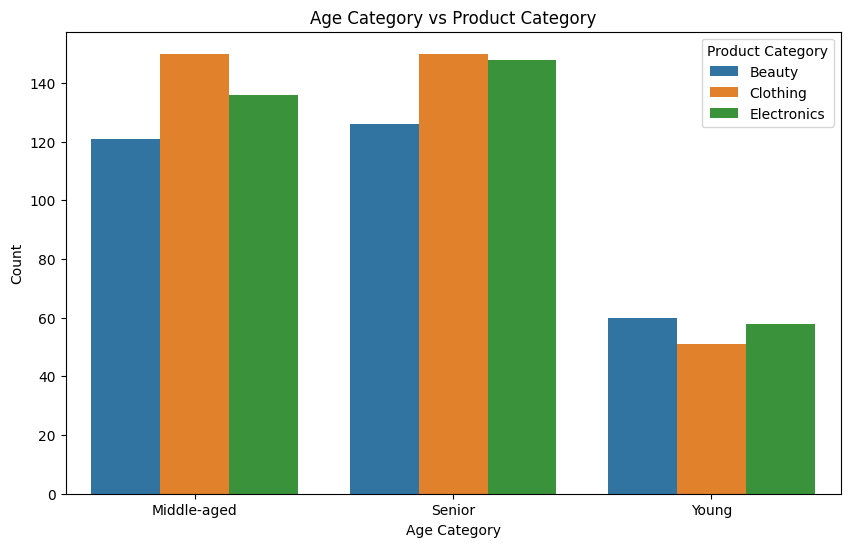

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Category', hue='Product Category', data=datasets)
plt.title('Age Category vs Product Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

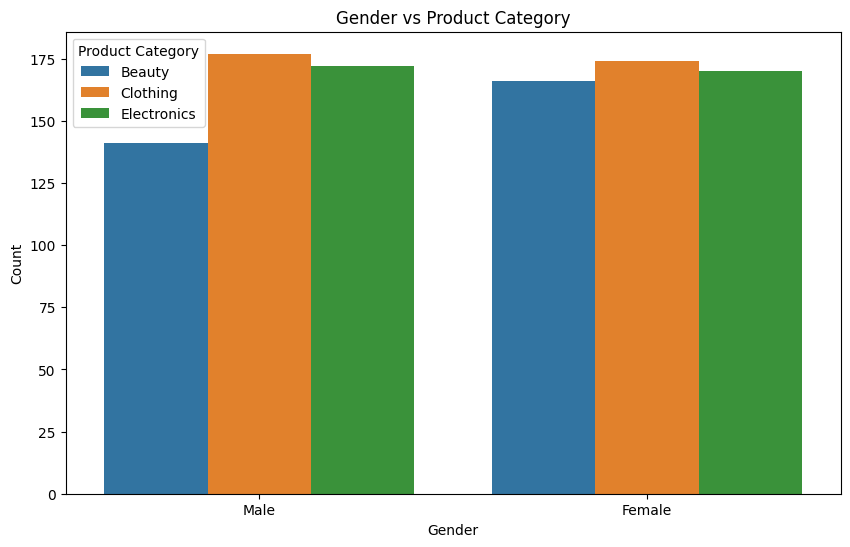

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Product Category', data=datasets)
plt.title('Gender vs Product Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

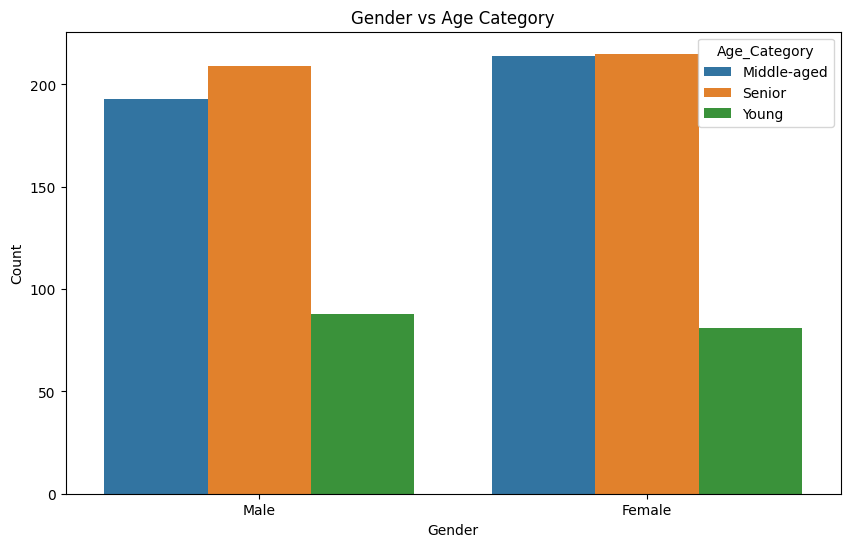

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Age_Category', data=datasets)
plt.title('Gender vs Age Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
datasets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Age_Category      1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 78.2+ KB


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Age_Category        0
dtype: int64


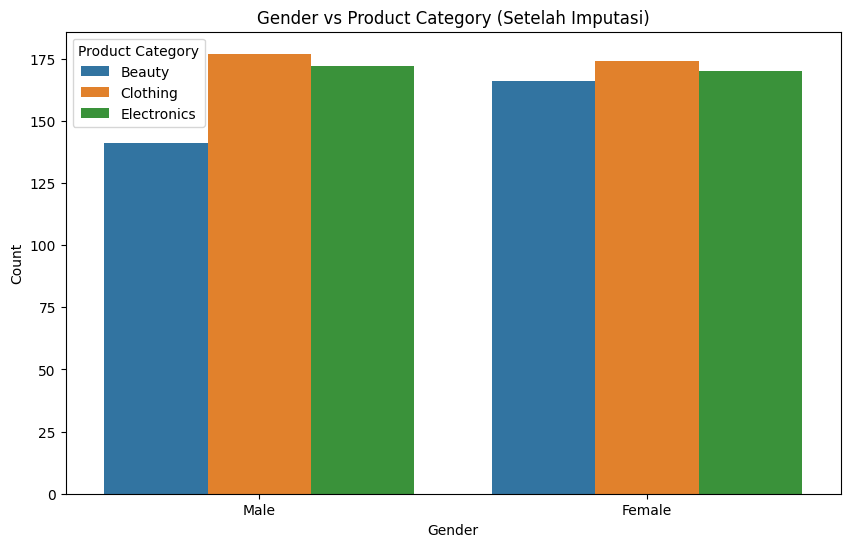

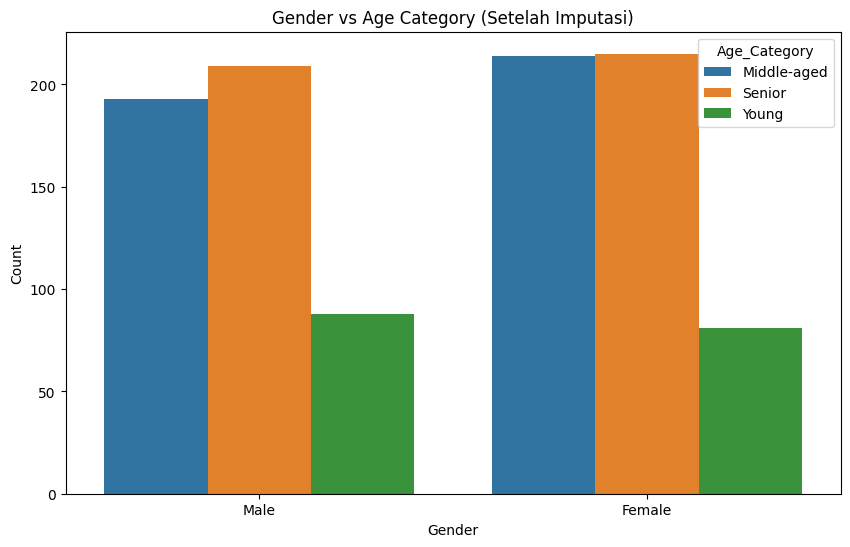

In [ ]:
# Mengisi nilai NaN pada kolom 'Gender' dengan modus
datasets['Gender'] = datasets['Gender'].fillna(datasets['Gender'].mode()[0])

# Periksa kembali nilai yang hilang setelah imputasi
print(datasets.isnull().sum())

# Visualisasi Gender vs Product Category setelah imputasi
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Product Category', data=datasets)
plt.title('Gender vs Product Category (Setelah Imputasi)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualisasi Gender vs Age Category setelah imputasi
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Age_Category', data=datasets)
plt.title('Gender vs Age Category (Setelah Imputasi)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


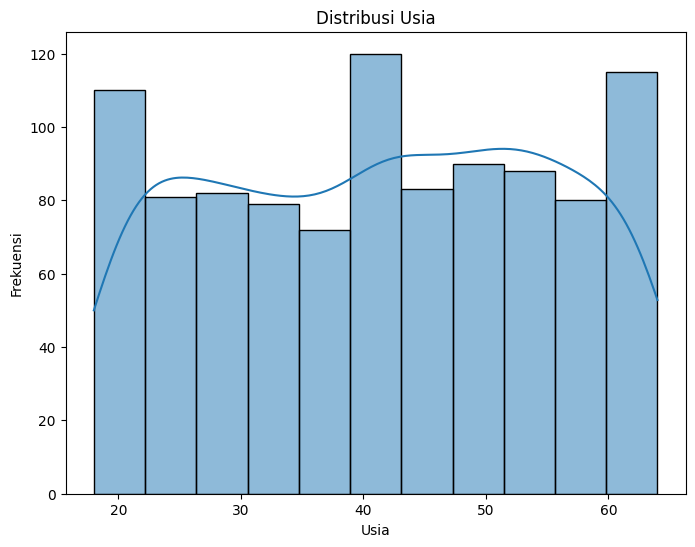

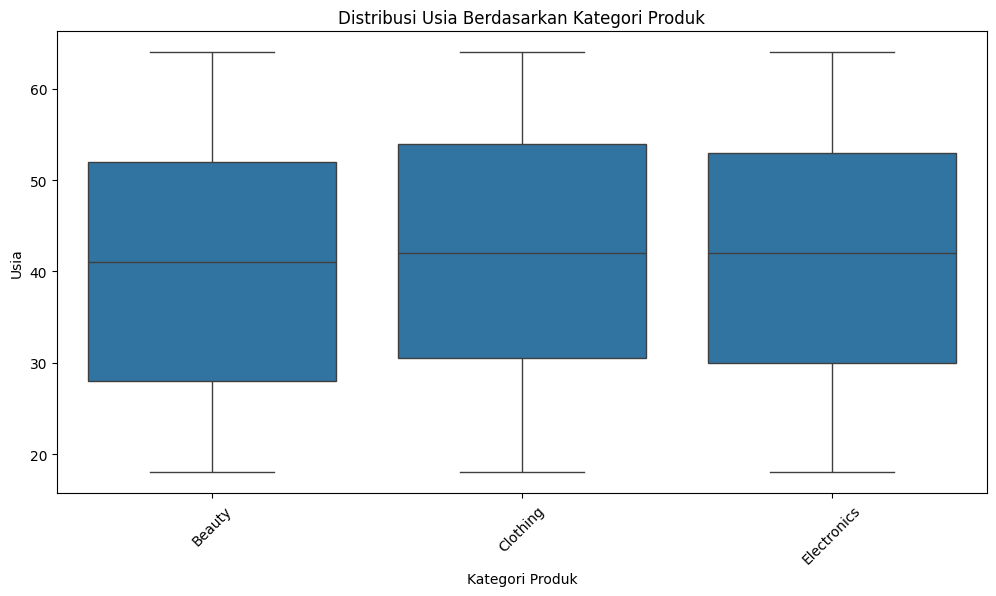

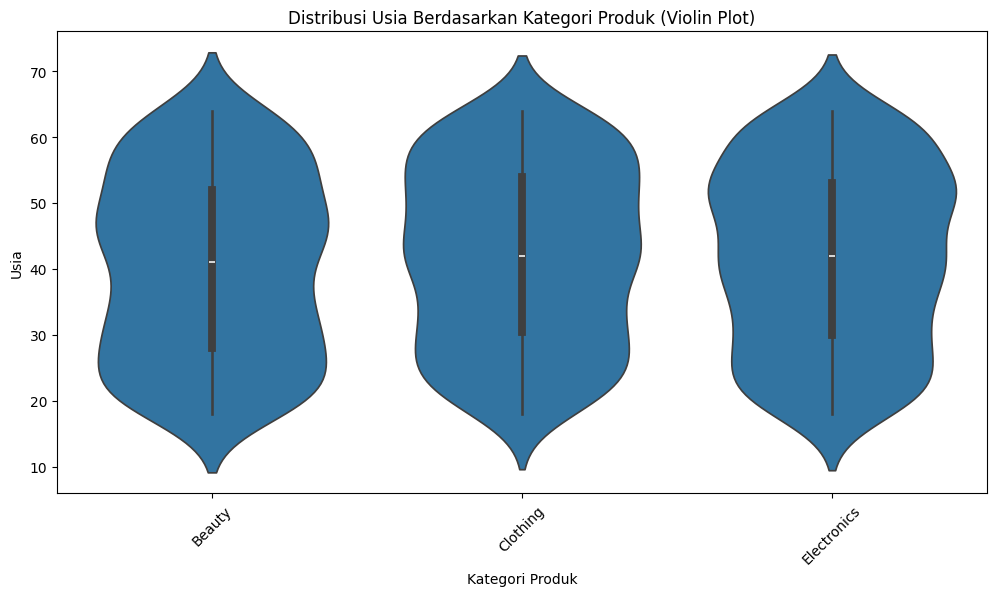

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age_Category


In [ ]:
# distribusi usia
plt.figure(figsize=(8, 6))
sns.histplot(datasets['Age'], kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


#distribusi usia berdasarkan kategori produk
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Age', data=datasets)
plt.title('Distribusi Usia Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Usia')
plt.xticks(rotation=45)
plt.show()

# distribusi usia berdasarkan kategori produk (lebih detail)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Product Category', y='Age', data=datasets)
plt.title('Distribusi Usia Berdasarkan Kategori Produk (Violin Plot)')
plt.xlabel('Kategori Produk')
plt.ylabel('Usia')
plt.xticks(rotation=45)
plt.show()

# Deskripsi statistik
print(datasets.describe())

# Mencari outlier (contoh pada kolom 'Age')
Q1 = datasets['Age'].quantile(0.25)
Q3 = datasets['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = datasets[(datasets['Age'] < lower_bound) | (datasets['Age'] > upper_bound)]
print("Outliers pada kolom 'Age':")
outliers


pemilihan model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan fitur (X) dan target (y)
X = datasets[['Age_Category', 'Product Category']]
y = datasets['Gender']

# Ubah fitur kategorikal menjadi numerik menggunakan one-hot encoding
X = pd.get_dummies(X, columns=[ 'Age_Category', 'Product Category'], drop_first=True)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Latih dan evaluasi setiap model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred)
    }

# Tampilkan hasil evaluasi
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 30)

# Pilih model terbaik berdasarkan akurasi atau metrik lain yang relevan
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = models[best_model_name]
print(f"Model terbaik: {best_model_name}")

Model: Decision Tree
Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

      Female       0.54      0.76      0.63       105
        Male       0.51      0.27      0.36        95

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.49       200
weighted avg       0.52      0.53      0.50       200

------------------------------
Model: Random Forest
Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

      Female       0.54      0.76      0.63       105
        Male       0.51      0.27      0.36        95

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.49       200
weighted avg       0.52      0.53      0.50       200

------------------------------
Model: Naive Bayes
Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

      Female       0.50      0.51      0.51       105


In [ ]:
# Inisialisasi model Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
# Latih model Decision Tree
decision_tree_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree: 0.53
              precision    recall  f1-score   support

      Female       0.54      0.76      0.63       105
        Male       0.51      0.27      0.36        95

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.49       200
weighted avg       0.52      0.53      0.50       200



Evaluasi Model


Accuracy of Decision Tree: 0.53
              precision    recall  f1-score   support

      Female       0.54      0.76      0.63       105
        Male       0.51      0.27      0.36        95

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.49       200
weighted avg       0.52      0.53      0.50       200



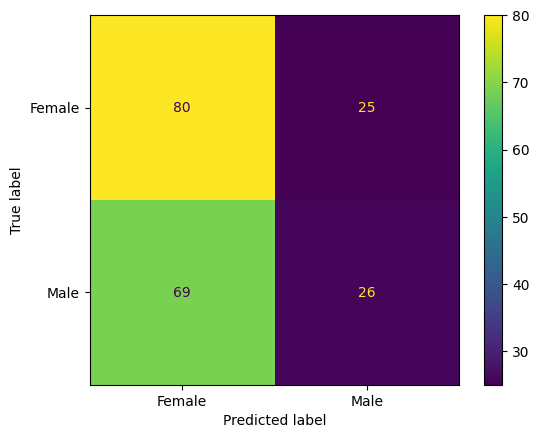

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Inisialisasi model Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Latih model Decision Tree
decision_tree_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt, labels=decision_tree_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_)
disp.plot()
plt.show()